In [142]:
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Text Cleaning
import neattext.functions as nfx

#Keyword Extraction
from collections import Counter

#Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report#plot_confusion_matrix

#Split Data
from sklearn.model_selection import train_test_split

#Save Trained Models
import joblib

## Data Importation/Inspection

In [2]:
df = pd.read_csv("train.csv")
df.head()

,text,emotion
0,Yeah for coupons! Found this place randomly ...,neutral
1,i still love to feel a gentle breeze and hear ...,happiness
2,"Normal, fama devido ao programa de tv. A sobre...",neutral
3,im feeling a little less jaded,sadness
4,i have never shaken the feeling of ferocious p...,hate


In [3]:
df.shape

(8000, 2)

In [4]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

In [5]:
df['emotion'].value_counts()

happiness    1468
neutral      1292
worry        1222
fun          1157
sadness      1146
hate         1143
surprise      572
Name: emotion, dtype: int64

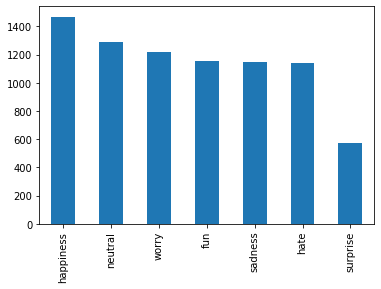

In [6]:
df['emotion'].value_counts().plot(kind='bar')

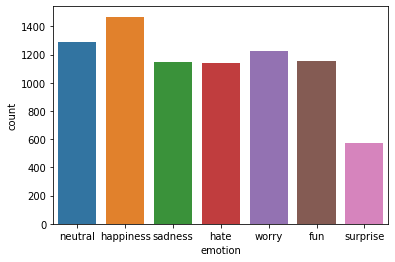

In [7]:
sns.countplot(x='emotion',data=df)

In [10]:
df['clean_text'] = df['text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)
df['clean_text'] = df['clean_text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)
df['clean_text'] = df['clean_text'].apply(nfx.remove_emojis)
df.head()

,text,emotion,clean_text
0,Yeah for coupons! Found this place randomly ...,neutral,Yeah coupons Found place randomly like it lot ...
1,i still love to feel a gentle breeze and hear ...,happiness,love feel gentle breeze hear peal soft wind ch...
2,"Normal, fama devido ao programa de tv. A sobre...",neutral,Normal fama devido ao programa de tv sobremesa...
3,im feeling a little less jaded,sadness,im feeling little jaded
4,i have never shaken the feeling of ferocious p...,hate,shaken feeling ferocious protectiveness mother


In [11]:
emotion_list = df['emotion'].unique().tolist()
emotion_list

['neutral', 'happiness', 'sadness', 'hate', 'worry', 'fun', 'surprise']

## Tokenization and Emotion class plots

In [12]:
def extract_key_words(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [13]:
hate_list = df[df['emotion']=='hate']['clean_text'].tolist()
hate_docx = ' '.join(hate_list)
hate_docx

'shaken feeling ferocious protectiveness mother feel like real nut job freaked germs putting dangerous body feeling fucked pretty warm night know best good cant help feel irritated feel cold stony surface underneath feel jealous new children apprehensive longer favorite feel rebellious feel like stoner things alright feel like insulted know feel pain furious feel confused hurt furious feel extremely irritated self pitying subtext quote taking psychological toll colleagues want feel feeling offended people emotional state lately feel selfish know let spoil mood cause think little feel irritated love eyes think rest face comments feel like people overlook face distracted body feel bitter times feel enraged cruel sick malicious thoughtless existence forced live day day feel disgusted disappointed thinking think feel disgusted feel fought hard im feeling slightly offended feel little bit emptier ironically little bit envious feel sickened disgusted sins man despite divinity feel sickened d

In [14]:
hate_keys = extract_key_words(hate_docx)
hate_keys

{'feel': 763,
 'feeling': 370,
 'like': 202,
 'im': 175,
 'time': 67,
 'little': 64,
 'people': 58,
 'know': 55,
 'angry': 50,
 'think': 49,
 'things': 45,
 'want': 41,
 'way': 35,
 'bitter': 34,
 'frustrated': 34,
 'greedy': 34,
 'mad': 34,
 'going': 33,
 'cant': 32,
 'insulted': 32,
 'offended': 32,
 'selfish': 32,
 'irritable': 32,
 'resentful': 32,
 'dont': 32,
 'rushed': 32,
 'fucked': 31,
 'disgusted': 31,
 'annoyed': 31,
 'hated': 31,
 'today': 31,
 'cold': 30,
 'bit': 30,
 'violent': 29,
 'agitated': 28,
 'help': 27,
 'jealous': 27,
 'bothered': 27,
 'ive': 27,
 'cranky': 27,
 'rude': 27,
 'impatient': 26,
 'dissatisfied': 26,
 'stressed': 26,
 'right': 25,
 'irritated': 24,
 'feelings': 24,
 'bitchy': 24,
 'thing': 23,
 'got': 23}

In [15]:
def plot_words(doc):
    m_cloud = WordCloud().generate(doc)
    plt.figure(figsize=(20,10))
    plt.imshow(m_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

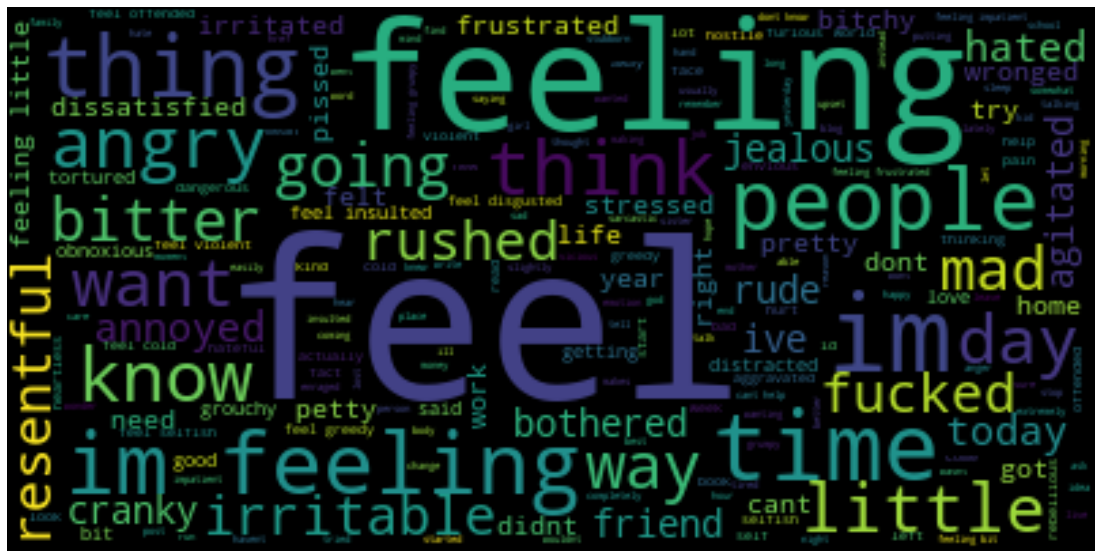

In [18]:
plot_words(hate_docx)

## Machine Learning 

In [88]:
Xfeatures = df['clean_text']
yfeatures = df['emotion']
Xfeatures

Yeah coupons Found place randomly like it lot different chocolate flavours chocoholics coming more let taste test like worry picking like


In [89]:
#Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

  (0, 16257)	1
  (0, 3535)	1
  (0, 5897)	1
  (0, 10806)	1
  (0, 11574)	1
  (0, 8403)	3
  (0, 7684)	1
  (0, 8570)	1
  (0, 4232)	1
  (0, 2812)	1
  (0, 5722)	1
  (0, 2809)	1
  (0, 3111)	1
  (0, 9344)	1
  (0, 8339)	1
  (0, 14367)	1
  (0, 14506)	1
  (0, 16178)	1
  (0, 10706)	1
  (1, 8588)	1
  (1, 5530)	1
  (1, 6188)	1
  (1, 2042)	1
  (1, 6770)	1
  (1, 10500)	1
  :	:
  (7996, 10239)	1
  (7996, 8460)	1
  (7997, 5530)	1
  (7997, 12712)	1
  (7997, 16156)	1
  (7997, 12934)	1
  (7997, 11405)	1
  (7998, 12787)	3
  (7998, 14264)	1
  (7998, 1398)	1
  (7998, 6339)	1
  (7998, 5822)	1
  (7998, 6373)	1
  (7998, 15431)	1
  (7998, 4317)	1
  (7998, 4319)	1
  (7998, 13975)	1
  (7998, 13779)	1
  (7998, 10358)	1
  (7999, 8403)	1
  (7999, 5530)	1
  (7999, 6770)	1
  (7999, 7658)	1
  (7999, 15828)	1
  (7999, 10175)	1


In [90]:
X.toarray()

  (0, 16257)	1
  (0, 3535)	1
  (0, 5897)	1
  (0, 10806)	1
  (0, 11574)	1
  (0, 8403)	3
  (0, 7684)	1
  (0, 8570)	1
  (0, 4232)	1
  (0, 2812)	1
  (0, 5722)	1
  (0, 2809)	1
  (0, 3111)	1
  (0, 9344)	1
  (0, 8339)	1
  (0, 14367)	1
  (0, 14506)	1
  (0, 16178)	1
  (0, 10706)	1
  (1, 8588)	1
  (1, 5530)	1
  (1, 6188)	1
  (1, 2042)	1
  (1, 6770)	1
  (1, 10500)	1
  :	:
  (7996, 10239)	1
  (7996, 8460)	1
  (7997, 5530)	1
  (7997, 12712)	1
  (7997, 16156)	1
  (7997, 12934)	1
  (7997, 11405)	1
  (7998, 12787)	3
  (7998, 14264)	1
  (7998, 1398)	1
  (7998, 6339)	1
  (7998, 5822)	1
  (7998, 6373)	1
  (7998, 15431)	1
  (7998, 4317)	1
  (7998, 4319)	1
  (7998, 13975)	1
  (7998, 13779)	1
  (7998, 10358)	1
  (7999, 8403)	1
  (7999, 5530)	1
  (7999, 6770)	1
  (7999, 7658)	1
  (7999, 15828)	1
  (7999, 10175)	1


In [75]:
#Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,yfeatures,test_size=0.30,random_state=50)

## Naive Bayes Classifier

In [91]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
#Accuracy
nv_model.score(X_test,y_test)

0.77875

In [134]:
y_nv_pred = nv_model.predict(X_test)
y_nv_pred

0.77875

In [93]:
accuracy_score(y_test, y_nv_pred)

array(['happiness', 'neutral', 'hate', ..., 'worry', 'sadness', 'neutral'],
      dtype='<U9')

In [176]:
sample_t = ['I hate Trump']
vect = cv.transform(sample_t).toarray()
prediction = nv_model.predict(vect)
print(prediction[0])

sadness


In [177]:
nv_model.predict_proba(vect)

array([[0.12605774, 0.11094428, 0.12830258, 0.13403076, 0.2535365 ,
        0.02869939, 0.21842876]])

In [98]:
nv_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype='<U9')

In [99]:
#Model Evaluation #
confusion_matrix(y_test,y_nv_pred)

array([[211,  84,  12,  12,  12,   2,  14],
       [  8, 395,   1,   4,   0,   0,   4],
       [  8,  27, 247,   6,  18,   0,  18],
       [  0,   0,   0, 409,   1,   8,   0],
       [ 12,  43,  29,   8, 233,   1,  34],
       [ 22,  23,  11,   5,   1,  67,  34],
       [  8,  26,  18,   5,   7,   5, 307]])

In [101]:
plot_confusion_matrix(nv_model,X_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [185]:
print(classification_report(y_test,y_nv_pred))

              precision    recall  f1-score   support

         fun       0.78      0.61      0.69       347
   happiness       0.66      0.96      0.78       412
        hate       0.78      0.76      0.77       324
     neutral       0.91      0.98      0.94       418
     sadness       0.86      0.65      0.74       360
    surprise       0.81      0.41      0.54       163
       worry       0.75      0.82      0.78       376

    accuracy                           0.78      2400
   macro avg       0.79      0.74      0.75      2400
weighted avg       0.79      0.78      0.77      2400



Save Model

In [102]:
model_file = open('emotional_classifier_nvModel.pkl','wb')
joblib.dump(nv_model,model_file)
model_file.close()

## Linear Regression

In [135]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_model.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.89625

In [136]:
y_lr_pred = lr_model.predict(X_test)
y_lr_pred

0.89625

In [109]:
accuracy_score(y_test, y_lr_pred)

array(['happiness', 'neutral', 'hate', ..., 'surprise', 'sadness',
       'neutral'], dtype=object)

In [178]:
sample_t = ['I hate Trump.']
vect = cv.transform(sample_t).toarray()
prediction = lr_model.predict(vect)
print(prediction[0])

hate


In [179]:
lr_model.predict_proba(vect)

array([[0.17626456, 0.04732853, 0.21706535, 0.15099584, 0.21480992,
        0.02107442, 0.17246138]])

In [112]:
lr_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype=object)

In [114]:
#Model Evaluation
confusion_matrix(y_test,y_lr_pred)

array([[284,  34,   7,   1,  11,   6,   4],
       [  4, 406,   1,   0,   0,   0,   1],
       [  7,   3, 288,   1,  15,   2,   8],
       [  2,   0,   2, 410,   2,   1,   1],
       [ 20,   7,  16,   0, 307,   1,   9],
       [  7,   1,   2,   0,   4, 145,   4],
       [  4,   2,  19,   1,   8,  31, 311]])

In [115]:
plot_confusion_matrix(lr_model,X_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [186]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

         fun       0.87      0.82      0.84       347
   happiness       0.90      0.99      0.94       412
        hate       0.86      0.89      0.87       324
     neutral       0.99      0.98      0.99       418
     sadness       0.88      0.85      0.87       360
    surprise       0.78      0.89      0.83       163
       worry       0.92      0.83      0.87       376

    accuracy                           0.90      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.90      0.90      0.90      2400



## Decision Tree Classifier

In [137]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

dtc_model.score(X_test,y_test)

0.8266666666666667

In [161]:
y_dtc_pred = dtc_model.predict(X_test)
y_dtc_pred

array(['fun', 'neutral', 'hate', ..., 'worry', 'sadness', 'neutral'],
      dtype=object)

In [162]:
accuracy_score(y_test, y_dtc_pred)

0.8266666666666667

In [127]:
sample_t = ['I hate Trump']
vect = cv.transform(sample_t).toarray()
prediction = dtc_model.predict(vect)
print(prediction[0])

hate


In [180]:
dtc_model.predict_proba(vect)

array([[0., 0., 1., 0., 0., 0., 0.]])

In [123]:
dtc_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype=object)

In [129]:
#Model Evaluation
confusion_matrix(y_test,y_dtc_pred)

array([[284,  34,   7,   1,  11,   6,   4],
       [  4, 406,   1,   0,   0,   0,   1],
       [  7,   3, 288,   1,  15,   2,   8],
       [  2,   0,   2, 410,   2,   1,   1],
       [ 20,   7,  16,   0, 307,   1,   9],
       [  7,   1,   2,   0,   4, 145,   4],
       [  4,   2,  19,   1,   8,  31, 311]])

In [130]:
plot_confusion_matrix(dtc_model,X_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [187]:
print(classification_report(y_test,y_dtc_pred))

              precision    recall  f1-score   support

         fun       0.73      0.65      0.69       347
   happiness       0.87      0.94      0.90       412
        hate       0.78      0.88      0.83       324
     neutral       0.97      0.88      0.92       418
     sadness       0.74      0.77      0.75       360
    surprise       0.76      0.80      0.78       163
       worry       0.87      0.83      0.85       376

    accuracy                           0.83      2400
   macro avg       0.82      0.82      0.82      2400
weighted avg       0.83      0.83      0.83      2400



## K-NN Classifier

In [157]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.40958333333333335

In [158]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.4266666666666667

In [159]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.42541666666666667

In [163]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.46166666666666667

#### As we can see we have better score for k=1

In [164]:
y_knn_pred = knn_model.predict(X_test)
y_knn_pred

array(['fun', 'happiness', 'hate', ..., 'worry', 'worry', 'fun'],
      dtype=object)

In [165]:
sample_t = ['I hate Trump']
vect = cv.transform(sample_t).toarray()
prediction = knn_model.predict(vect)
print(prediction[0])

fun


In [181]:
knn_model.predict_proba(vect)

array([[1., 0., 0., 0., 0., 0., 0.]])

In [183]:
knn_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype=object)

In [190]:
confusion_matrix(y_test,y_dtc_pred)

array([[227,  26,   8,   2,  74,   5,   5],
       [ 17, 387,   2,   3,   0,   2,   1],
       [  6,   5, 286,   1,   9,   4,  13],
       [  5,  12,  22, 366,   4,   8,   1],
       [ 40,   9,  25,   3, 276,   1,   6],
       [  6,   0,   1,   0,   4, 131,  21],
       [  8,   5,  21,   1,   8,  22, 311]])

In [191]:
plot_confusion_matrix(dtc_model,X_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [192]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

         fun       0.31      0.29      0.30       347
   happiness       0.53      0.61      0.57       412
        hate       0.46      0.54      0.50       324
     neutral       1.00      0.24      0.39       418
     sadness       0.37      0.53      0.44       360
    surprise       0.57      0.53      0.55       163
       worry       0.45      0.53      0.49       376

    accuracy                           0.46      2400
   macro avg       0.53      0.47      0.46      2400
weighted avg       0.54      0.46      0.46      2400

